# **Customer Segmentation Using RFM Analysis**

**Data-Driven Insights with Python, NumPy, and Pandas**
In this project, I performed a comprehensive RFM (Recency, Frequency, Monetary) analysis on customer transaction data using Python. The data was sourced from an Excel file uploaded to Google Drive, and the analysis was conducted in Google Colab. The following DataFrames were created from the uploaded Excel sheets:

customers_df for customer information
orders_df for order details
transactions_df for transaction records
returns_df for returned orders
Using the powerful data manipulation capabilities of NumPy and Pandas, I cleaned, processed, and analyzed the data to segment customers based on their purchasing behavior. This segmentation provided actionable insights for targeted marketing strategies, allowing for a more tailored approach to customer engagement.

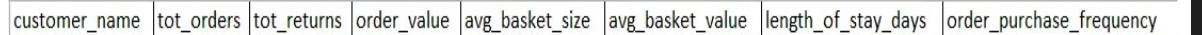

# **Data Importing**

Importing data from CSV files stored in Google Drive.

## **Step 1: Importing Required Libraries**

First, import the necessary libraries for data analysis.

In [ ]:
# Mounting Google Drive to access files
# prompt: import google drive  and add drive in it pandas and datetime numpyalso

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import datetime
import numpy as np


Mounted at /content/drive


2. Loading CSV Files from Google Drive

In [ ]:
# Reading CSV files from the mounted Google Drive folder
# Adding CSV files inside /content/drive/MyDrive/rfm_final into a list of DataFrames

df = []
for file in os.listdir('/content/drive/MyDrive/rfm_final'):
    if file.endswith('.csv'):
        df.append(pd.read_csv('/content/drive/MyDrive/rfm_final/' + file))

# Assigning DataFrames to specific variables
customers_df = df[0]
orders_df = df[1]
transactions_df = df[2]
returns_df = df[3]

In [ ]:
customers_df


,customer_id,customer_name,segment,zip_code,region,country,city,state,contact_number,joining_date
0,AA-10315,Alex Avila,Consumer,55407,Central,United States,minneapolis,minnesota,582-262-8228,2023-02-21
1,AA-10375,Allen Armold,Consumer,94109,West,United States,san francisco,california,505-671-1025,2023-08-09
2,AA-10480,Andrew Allen,Consumer,94122,West,United States,san francisco,california,248-294-9683,2023-03-20
3,AA-10645,Anna Andreadi,Consumer,78664,Central,United States,round rock,texas,582-282-8675,2023-03-20
4,AB-10015,Aaron Bergman,Consumer,10011,East,United States,new york city,new york,505-559-3741,2023-09-21
...,...,...,...,...,...,...,...,...,...,...
788,TW-21025,Tamara Willingham,Home Office,90004,West,United States,los angeles,california,02128388643,2023-11-05
789,VF-21715,Vicky Freymann,Home Office,73120,Central,United States,oklahoma city,oklahoma,04242171893,2023-01-25
790,VM-21685,Valerie Mitchum,Home Office,46350,Central,United States,la porte,indiana,02179141784,2023-09-13
791,VP-21730,Victor Preis,Home Office,98105,West,United States,seattle,washington,05056622772,2023-12-11


In [ ]:
orders_df

,order_id,customer_id,ship_mode,vendor_id,order_status,order_purchase_date,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,CA-2014-101147,NaN,First Class,VEN02,delivered,12/16/17 22:28,2017-12-16 22:38,2017-12-19 20:32,2017-12-27 18:03,2018-01-18
1,CA-2014-101476,SD-20485,First Class,VEN04,delivered,1/23/17 13:40,2017-01-25 02:50,2017-01-26 11:26,2017-01-30 08:42,2017-02-28
2,CA-2014-101602,NaN,First Class,VEN05,delivered,5/17/17 21:10,2017-05-17 21:22,2017-05-19 10:42,2017-05-24 11:07,2017-06-08
3,CA-2014-101931,TS-21370,First Class,VEN03,delivered,10/22/17 14:25,2017-10-22 14:49,2017-10-23 18:50,2017-10-27 21:23,2017-11-10
4,CA-2014-103058,AG-10270,First Class,VEN01,delivered,1/30/18 11:03,2018-01-30 11:15,2018-02-05 15:44,2018-02-21 17:53,2018-03-13
...,...,...,...,...,...,...,...,...,...,...
5010,US-2017-167570,EG-13900,Standard Class,VEN01,delivered,8/2/18 12:32,2018-08-02 13:23,2018-08-03 12:20,2018-08-07 21:04,2018-08-17
5011,US-2017-168613,GM-14440,Standard Class,VEN05,delivered,9/20/17 22:48,2017-09-22 04:16,2017-09-22 20:59,2017-09-28 16:02,2017-10-16
5012,US-2017-168690,TS-21085,Standard Class,VEN04,delivered,2/4/18 19:45,2018-02-06 03:48,2018-02-08 21:19,2018-02-20 21:59,2018-03-20
5013,US-2017-168802,JO-15145,Standard Class,VEN03,delivered,3/9/17 8:47,2017-03-09 08:47,2017-03-09 14:01,2017-03-17 04:14,2017-03-31


In [ ]:
transactions_df

,id,order_id,product_id,sales_amt,qty,discount,profit_amt
0,2698,CA-2014-145317,FUR-BO-10001798,261.9600,2,0.000,41.9136
1,6827,CA-2016-118689,FUR-CH-10000454,731.9400,3,0.000,219.5820
2,8154,CA-2017-140151,OFF-LA-10000240,14.6200,2,0.000,6.8714
3,2624,CA-2017-127180,FUR-TA-10000577,957.5775,5,0.450,-383.0310
4,4191,CA-2017-166709,OFF-ST-10000760,22.3680,2,0.200,2.5164
...,...,...,...,...,...,...,...
9814,2107,US-2014-152723,FUR-FU-10001889,25.2480,3,0.200,4.1028
9815,4712,CA-2014-112403,FUR-FU-10000747,91.9600,2,0.000,15.6332
9816,8659,CA-2016-168361,TEC-PH-10003645,258.5760,2,0.200,19.3932
9817,9293,CA-2017-124114,OFF-PA-10004041,29.6000,4,0.000,13.3200


In [ ]:
returns_df


,order_id,return_reason
0,CA-2014-100762,Wrong Delivery
1,CA-2014-100867,Wrong Delivery
2,CA-2014-102652,Damaged
3,CA-2014-103373,Damaged
4,CA-2014-103744,Not Satisfied
...,...,...
291,US-2017-136679,Not Satisfied
292,US-2017-147886,Not Satisfied
293,US-2017-147998,Not Satisfied
294,US-2017-151127,Not Satisfied


# Data Cleaning

In [ ]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     793 non-null    object
 1   customer_name   793 non-null    object
 2   segment         793 non-null    object
 3   zip_code        793 non-null    int64 
 4   region          793 non-null    object
 5   country         793 non-null    object
 6   city            793 non-null    object
 7   state           793 non-null    object
 8   contact_number  793 non-null    object
 9   joining_date    793 non-null    object
dtypes: int64(1), object(9)
memory usage: 62.1+ KB


In [ ]:
customers_df[customers_df.duplicated()]

,customer_id,customer_name,segment,zip_code,region,country,city,state,contact_number,joining_date


In [ ]:
customers_df[customers_df.isna().any(axis=1)]

,customer_id,customer_name,segment,zip_code,region,country,city,state,contact_number,joining_date


In [ ]:
#assigning final data to new value
customers=customers_df

customers data is clean no null values no duplicates present


In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5015 entries, 0 to 5014
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       5015 non-null   object
 1   customer_id                    5007 non-null   object
 2   ship_mode                      5015 non-null   object
 3   vendor_id                      5015 non-null   object
 4   order_status                   5015 non-null   object
 5   order_purchase_date            5015 non-null   object
 6   order_approved_at              5005 non-null   object
 7   order_delivered_carrier_date   4935 non-null   object
 8   order_delivered_customer_date  4866 non-null   object
 9   order_estimated_delivery_date  5005 non-null   object
dtypes: object(10)
memory usage: 391.9+ KB


In [ ]:
orders_df[orders_df.duplicated()]

,order_id,customer_id,ship_mode,vendor_id,order_status,order_purchase_date,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1062,CA-2014-103527,CC-12220,Second Class,VEN01,delivered,11/23/17 18:41,2017-11-23 18:49,2017-11-25 15:12,2017-12-09 18:09,2017-12-18
1063,CA-2014-103527,CC-12220,Second Class,VEN01,delivered,11/23/17 18:41,2017-11-23 18:49,2017-11-25 15:12,2017-12-09 18:09,2017-12-18
2046,CA-2014-103219,BF-11215,Standard Class,VEN04,delivered,1/9/18 17:03,2018-01-09 17:32,2018-01-10 22:43,2018-01-22 19:58,2018-02-23
2047,CA-2014-103219,BF-11215,Standard Class,VEN04,delivered,1/9/18 17:03,2018-01-09 17:32,2018-01-10 22:43,2018-01-22 19:58,2018-02-23


In [ ]:
#removing duplicated order_id one order id is linked to one customer
orders_df.drop_duplicates(subset=['order_id'],inplace=True)

In [ ]:
orders_df[orders_df.duplicated()]

,order_id,customer_id,ship_mode,vendor_id,order_status,order_purchase_date,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


In [ ]:
orders_df[orders_df['customer_id'].isna()]

,order_id,customer_id,ship_mode,vendor_id,order_status,order_purchase_date,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,CA-2014-101147,NaN,First Class,VEN02,delivered,12/16/17 22:28,2017-12-16 22:38,2017-12-19 20:32,2017-12-27 18:03,2018-01-18
2,CA-2014-101602,NaN,First Class,VEN05,delivered,5/17/17 21:10,2017-05-17 21:22,2017-05-19 10:42,2017-05-24 11:07,2017-06-08
1051,CA-2014-100706,NaN,Second Class,VEN01,delivered,11/9/17 13:00,2017-11-09 13:10,2017-11-14 16:23,2017-11-21 18:42,2017-11-29
1055,CA-2014-101560,NaN,Second Class,VEN04,delivered,2/12/18 12:39,2018-02-12 12:55,2018-02-15 01:28,2018-02-21 21:16,2018-03-08
1056,CA-2014-101833,NaN,Second Class,VEN05,delivered,2/13/18 17:00,2018-02-13 17:10,2018-02-15 15:13,2018-03-01 22:18,2018-03-06
2019,CA-2014-100293,NaN,Standard Class,VEN02,delivered,5/14/18 9:29,2018-05-14 09:54,2018-05-14 14:59,2018-05-23 21:06,2018-06-05
2025,CA-2014-100867,NaN,Standard Class,VEN03,delivered,10/2/17 19:04,2017-10-04 03:03,2017-10-04 20:55,2017-10-26 01:58,2017-10-30
2033,CA-2014-101462,NaN,Standard Class,VEN05,delivered,7/6/18 21:38,2018-07-07 11:25,2018-07-10 12:18,2018-07-28 20:15,2018-08-10


In [ ]:
#droping the values where customer_id is null
orders_df.dropna(subset=['customer_id'],inplace=True)

In [ ]:
orders_df[orders_df['customer_id'].isna()]

,order_id,customer_id,ship_mode,vendor_id,order_status,order_purchase_date,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5001 entries, 1 to 5014
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       5001 non-null   object
 1   customer_id                    5001 non-null   object
 2   ship_mode                      5001 non-null   object
 3   vendor_id                      5001 non-null   object
 4   order_status                   5001 non-null   object
 5   order_purchase_date            5001 non-null   object
 6   order_approved_at              4991 non-null   object
 7   order_delivered_carrier_date   4921 non-null   object
 8   order_delivered_customer_date  4852 non-null   object
 9   order_estimated_delivery_date  4991 non-null   object
dtypes: object(10)
memory usage: 429.8+ KB


In [ ]:
# for analysis we want only values where order is deliverd
orders=orders_df[orders_df['order_status']=='delivered']

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4852 entries, 1 to 5014
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       4852 non-null   object
 1   customer_id                    4852 non-null   object
 2   ship_mode                      4852 non-null   object
 3   vendor_id                      4852 non-null   object
 4   order_status                   4852 non-null   object
 5   order_purchase_date            4852 non-null   object
 6   order_approved_at              4852 non-null   object
 7   order_delivered_carrier_date   4852 non-null   object
 8   order_delivered_customer_date  4852 non-null   object
 9   order_estimated_delivery_date  4852 non-null   object
dtypes: object(10)
memory usage: 417.0+ KB


Same process with transaction and returns


In [ ]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9819 entries, 0 to 9818
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          9819 non-null   int64  
 1   order_id    9819 non-null   object 
 2   product_id  9819 non-null   object 
 3   sales_amt   9819 non-null   float64
 4   qty         9819 non-null   int64  
 5   discount    9819 non-null   float64
 6   profit_amt  9818 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 537.1+ KB


In [ ]:
transactions_df[transactions_df.duplicated()]

,id,order_id,product_id,sales_amt,qty,discount,profit_amt


In [ ]:
transactions_df[transactions_df.isna()].count()

,0
id,0
order_id,0
product_id,0
sales_amt,0
qty,0
discount,0
profit_amt,0


In [ ]:
transactions=transactions_df

In [ ]:
returns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_id       296 non-null    object
 1   return_reason  296 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


In [ ]:
returns_df[returns_df.duplicated()]

,order_id,return_reason


In [ ]:
returns_df[returns_df.isna()].count()

,0
order_id,0
return_reason,0


In [ ]:
returns=returns_df

# Data Preparation

In [ ]:
customers

,customer_id,customer_name,segment,zip_code,region,country,city,state,contact_number,joining_date
0,AA-10315,Alex Avila,Consumer,55407,Central,United States,minneapolis,minnesota,582-262-8228,2023-02-21
1,AA-10375,Allen Armold,Consumer,94109,West,United States,san francisco,california,505-671-1025,2023-08-09
2,AA-10480,Andrew Allen,Consumer,94122,West,United States,san francisco,california,248-294-9683,2023-03-20
3,AA-10645,Anna Andreadi,Consumer,78664,Central,United States,round rock,texas,582-282-8675,2023-03-20
4,AB-10015,Aaron Bergman,Consumer,10011,East,United States,new york city,new york,505-559-3741,2023-09-21
...,...,...,...,...,...,...,...,...,...,...
788,TW-21025,Tamara Willingham,Home Office,90004,West,United States,los angeles,california,02128388643,2023-11-05
789,VF-21715,Vicky Freymann,Home Office,73120,Central,United States,oklahoma city,oklahoma,04242171893,2023-01-25
790,VM-21685,Valerie Mitchum,Home Office,46350,Central,United States,la porte,indiana,02179141784,2023-09-13
791,VP-21730,Victor Preis,Home Office,98105,West,United States,seattle,washington,05056622772,2023-12-11


In [ ]:
orders

,order_id,customer_id,ship_mode,vendor_id,order_status,order_purchase_date,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1,CA-2014-101476,SD-20485,First Class,VEN04,delivered,1/23/17 13:40,2017-01-25 02:50,2017-01-26 11:26,2017-01-30 08:42,2017-02-28
3,CA-2014-101931,TS-21370,First Class,VEN03,delivered,10/22/17 14:25,2017-10-22 14:49,2017-10-23 18:50,2017-10-27 21:23,2017-11-10
4,CA-2014-103058,AG-10270,First Class,VEN01,delivered,1/30/18 11:03,2018-01-30 11:15,2018-02-05 15:44,2018-02-21 17:53,2018-03-13
5,CA-2014-103100,AB-10105,First Class,VEN02,delivered,8/15/18 9:38,2018-08-17 03:10,2018-08-17 15:40,2018-08-22 21:13,2018-09-12
6,CA-2014-103317,DM-13525,First Class,VEN01,delivered,8/6/18 8:44,2018-08-06 09:04,2018-08-07 16:11,2018-08-14 22:18,2018-08-21
...,...,...,...,...,...,...,...,...,...,...
5010,US-2017-167570,EG-13900,Standard Class,VEN01,delivered,8/2/18 12:32,2018-08-02 13:23,2018-08-03 12:20,2018-08-07 21:04,2018-08-17
5011,US-2017-168613,GM-14440,Standard Class,VEN05,delivered,9/20/17 22:48,2017-09-22 04:16,2017-09-22 20:59,2017-09-28 16:02,2017-10-16
5012,US-2017-168690,TS-21085,Standard Class,VEN04,delivered,2/4/18 19:45,2018-02-06 03:48,2018-02-08 21:19,2018-02-20 21:59,2018-03-20
5013,US-2017-168802,JO-15145,Standard Class,VEN03,delivered,3/9/17 8:47,2017-03-09 08:47,2017-03-09 14:01,2017-03-17 04:14,2017-03-31


we have to merge the customers and order to get the tot_orders count what merge we have to choose we want all the data of order that placed also we want data of customers soo outer merge


In [ ]:
# Merging DataFrames to combine customer orders and transactions data
customers_orders=pd.merge(customers,orders,on='customer_id',how='outer')
customers_orders

,customer_id,customer_name,segment,zip_code,region,country,city,state,contact_number,joining_date,order_id,ship_mode,vendor_id,order_status,order_purchase_date,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,AA-10315,Alex Avila,Consumer,55407.0,Central,United States,minneapolis,minnesota,582-262-8228,2023-02-21,CA-2015-121391,First Class,VEN04,delivered,1/15/18 9:31,2018-01-15 09:50,2018-01-17 15:05,2018-01-26 18:04,2018-02-14
1,AA-10315,Alex Avila,Consumer,55407.0,Central,United States,minneapolis,minnesota,582-262-8228,2023-02-21,CA-2014-128055,Standard Class,VEN03,delivered,6/12/18 15:48,2018-06-13 09:00,2018-06-13 14:57,2018-06-19 23:06,2018-07-16
2,AA-10315,Alex Avila,Consumer,55407.0,Central,United States,minneapolis,minnesota,582-262-8228,2023-02-21,CA-2014-138100,Standard Class,VEN04,delivered,1/17/17 14:57,2017-01-18 02:10,2017-01-19 09:12,2017-01-24 15:14,2017-02-23
3,AA-10315,Alex Avila,Consumer,55407.0,Central,United States,minneapolis,minnesota,582-262-8228,2023-02-21,CA-2016-103982,Standard Class,VEN02,delivered,6/22/17 15:53,2017-06-22 16:05,2017-06-23 12:05,2017-06-27 12:32,2017-07-05
4,AA-10315,Alex Avila,Consumer,55407.0,Central,United States,minneapolis,minnesota,582-262-8228,2023-02-21,CA-2017-147039,Standard Class,VEN02,delivered,9/13/17 18:49,2017-09-13 19:04,2017-09-15 21:05,2017-09-23 15:35,2017-10-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4847,VP-21730,Victor Preis,Home Office,98105.0,West,United States,seattle,washington,05056622772,2023-12-11,CA-2017-105333,Standard Class,VEN01,delivered,7/26/17 17:46,2017-07-27 17:55,2017-07-28 17:36,2017-08-01 19:10,2017-08-17
4848,VT-21700,Valerie Takahito,Home Office,42301.0,South,United States,owensboro,kentucky,05825291731,2023-04-24,CA-2014-151897,Standard Class,VEN02,delivered,2/8/18 4:26,2018-02-08 05:30,2018-02-08 17:48,2018-02-17 13:32,2018-03-19
4849,VT-21700,Valerie Takahito,Home Office,42301.0,South,United States,owensboro,kentucky,05825291731,2023-04-24,CA-2015-167010,Standard Class,VEN03,delivered,11/8/17 17:33,2017-11-09 17:48,2017-11-10 21:59,2017-11-21 22:19,2017-11-30
4850,KL-15505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CA-2014-103590,Standard Class,VEN05,delivered,3/1/18 16:43,2018-03-01 16:55,2018-03-05 11:32,2018-03-17 10:08,2018-03-20


# task 1.Customer_id with Customer name

In [ ]:
# Grouping data by customer_id and aggregating relevant metrics


first_task =customers_orders.groupby(['customer_id','customer_name']).agg(tot_orders=('order_id','count')).reset_index()
first_task=first_task[['customer_id','customer_name']]
first_task


,customer_id,customer_name
0,AA-10315,Alex Avila
1,AA-10375,Allen Armold
2,AA-10480,Andrew Allen
3,AA-10645,Anna Andreadi
4,AB-10015,Aaron Bergman
...,...,...
788,XP-21865,Xylona Preis
789,YC-21895,Yoseph Carroll
790,YS-21880,Yana Sorensen
791,ZC-21910,Zuschuss Carroll


# Task 2. Customer_id with tot_orders

In [ ]:
# Grouping data by customer_id and aggregating relevant metrics
second_task=customers_orders.groupby(['customer_id']).agg(tot_orders=('order_id','count')).reset_index()
second_task

,customer_id,tot_orders
0,AA-10315,5
1,AA-10375,9
2,AA-10480,4
3,AA-10645,6
4,AB-10015,3
...,...,...
790,XP-21865,11
791,YC-21895,4
792,YS-21880,8
793,ZC-21910,13


# Task 3. Customer_id with tot_returns

In [ ]:
returns

,order_id,return_reason
0,CA-2014-100762,Wrong Delivery
1,CA-2014-100867,Wrong Delivery
2,CA-2014-102652,Damaged
3,CA-2014-103373,Damaged
4,CA-2014-103744,Not Satisfied
...,...,...
291,US-2017-136679,Not Satisfied
292,US-2017-147886,Not Satisfied
293,US-2017-147998,Not Satisfied
294,US-2017-151127,Not Satisfied


In [ ]:
# Merging DataFrames to combine customer orders and transactions data
#note that all orders place not sure has been returned soo took all orders and joh return hue haireturns_orders=pd.merge(orders,returns,on='order_id',how='outer')
customers_orders_returns=pd.merge(customers_orders,returns,on='order_id',how='left')
customers_orders_returns

,customer_id,customer_name,segment,zip_code,region,country,city,state,contact_number,joining_date,order_id,ship_mode,vendor_id,order_status,order_purchase_date,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,return_reason
0,AA-10315,Alex Avila,Consumer,55407.0,Central,United States,minneapolis,minnesota,582-262-8228,2023-02-21,CA-2015-121391,First Class,VEN04,delivered,1/15/18 9:31,2018-01-15 09:50,2018-01-17 15:05,2018-01-26 18:04,2018-02-14,NaN
1,AA-10315,Alex Avila,Consumer,55407.0,Central,United States,minneapolis,minnesota,582-262-8228,2023-02-21,CA-2014-128055,Standard Class,VEN03,delivered,6/12/18 15:48,2018-06-13 09:00,2018-06-13 14:57,2018-06-19 23:06,2018-07-16,NaN
2,AA-10315,Alex Avila,Consumer,55407.0,Central,United States,minneapolis,minnesota,582-262-8228,2023-02-21,CA-2014-138100,Standard Class,VEN04,delivered,1/17/17 14:57,2017-01-18 02:10,2017-01-19 09:12,2017-01-24 15:14,2017-02-23,NaN
3,AA-10315,Alex Avila,Consumer,55407.0,Central,United States,minneapolis,minnesota,582-262-8228,2023-02-21,CA-2016-103982,Standard Class,VEN02,delivered,6/22/17 15:53,2017-06-22 16:05,2017-06-23 12:05,2017-06-27 12:32,2017-07-05,NaN
4,AA-10315,Alex Avila,Consumer,55407.0,Central,United States,minneapolis,minnesota,582-262-8228,2023-02-21,CA-2017-147039,Standard Class,VEN02,delivered,9/13/17 18:49,2017-09-13 19:04,2017-09-15 21:05,2017-09-23 15:35,2017-10-11,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4847,VP-21730,Victor Preis,Home Office,98105.0,West,United States,seattle,washington,05056622772,2023-12-11,CA-2017-105333,Standard Class,VEN01,delivered,7/26/17 17:46,2017-07-27 17:55,2017-07-28 17:36,2017-08-01 19:10,2017-08-17,NaN
4848,VT-21700,Valerie Takahito,Home Office,42301.0,South,United States,owensboro,kentucky,05825291731,2023-04-24,CA-2014-151897,Standard Class,VEN02,delivered,2/8/18 4:26,2018-02-08 05:30,2018-02-08 17:48,2018-02-17 13:32,2018-03-19,NaN
4849,VT-21700,Valerie Takahito,Home Office,42301.0,South,United States,owensboro,kentucky,05825291731,2023-04-24,CA-2015-167010,Standard Class,VEN03,delivered,11/8/17 17:33,2017-11-09 17:48,2017-11-10 21:59,2017-11-21 22:19,2017-11-30,NaN
4850,KL-15505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CA-2014-103590,Standard Class,VEN05,delivered,3/1/18 16:43,2018-03-01 16:55,2018-03-05 11:32,2018-03-17 10:08,2018-03-20,NaN


In [ ]:
# Grouping data by customer_id and aggregating relevant metrics
third_task=customers_orders_returns.groupby(['customer_id']).agg(tot_returns=('return_reason','count')).reset_index()
third_task

,customer_id,tot_returns
0,AA-10315,0
1,AA-10375,0
2,AA-10480,0
3,AA-10645,1
4,AB-10015,0
...,...,...
790,XP-21865,2
791,YC-21895,0
792,YS-21880,0
793,ZC-21910,1


# Task 4. customer_id with avg_basket_size

In [ ]:
transactions

,id,order_id,product_id,sales_amt,qty,discount,profit_amt
0,2698,CA-2014-145317,FUR-BO-10001798,261.9600,2,0.000,41.9136
1,6827,CA-2016-118689,FUR-CH-10000454,731.9400,3,0.000,219.5820
2,8154,CA-2017-140151,OFF-LA-10000240,14.6200,2,0.000,6.8714
3,2624,CA-2017-127180,FUR-TA-10000577,957.5775,5,0.450,-383.0310
4,4191,CA-2017-166709,OFF-ST-10000760,22.3680,2,0.200,2.5164
...,...,...,...,...,...,...,...
9814,2107,US-2014-152723,FUR-FU-10001889,25.2480,3,0.200,4.1028
9815,4712,CA-2014-112403,FUR-FU-10000747,91.9600,2,0.000,15.6332
9816,8659,CA-2016-168361,TEC-PH-10003645,258.5760,2,0.200,19.3932
9817,9293,CA-2017-124114,OFF-PA-10004041,29.6000,4,0.000,13.3200


In [ ]:
customers_orders_returns

,customer_id,customer_name,segment,zip_code,region,country,city,state,contact_number,joining_date,order_id,ship_mode,vendor_id,order_status,order_purchase_date,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,return_reason
0,AA-10315,Alex Avila,Consumer,55407.0,Central,United States,minneapolis,minnesota,582-262-8228,2023-02-21,CA-2015-121391,First Class,VEN04,delivered,1/15/18 9:31,2018-01-15 09:50,2018-01-17 15:05,2018-01-26 18:04,2018-02-14,NaN
1,AA-10315,Alex Avila,Consumer,55407.0,Central,United States,minneapolis,minnesota,582-262-8228,2023-02-21,CA-2014-128055,Standard Class,VEN03,delivered,6/12/18 15:48,2018-06-13 09:00,2018-06-13 14:57,2018-06-19 23:06,2018-07-16,NaN
2,AA-10315,Alex Avila,Consumer,55407.0,Central,United States,minneapolis,minnesota,582-262-8228,2023-02-21,CA-2014-138100,Standard Class,VEN04,delivered,1/17/17 14:57,2017-01-18 02:10,2017-01-19 09:12,2017-01-24 15:14,2017-02-23,NaN
3,AA-10315,Alex Avila,Consumer,55407.0,Central,United States,minneapolis,minnesota,582-262-8228,2023-02-21,CA-2016-103982,Standard Class,VEN02,delivered,6/22/17 15:53,2017-06-22 16:05,2017-06-23 12:05,2017-06-27 12:32,2017-07-05,NaN
4,AA-10315,Alex Avila,Consumer,55407.0,Central,United States,minneapolis,minnesota,582-262-8228,2023-02-21,CA-2017-147039,Standard Class,VEN02,delivered,9/13/17 18:49,2017-09-13 19:04,2017-09-15 21:05,2017-09-23 15:35,2017-10-11,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4847,VP-21730,Victor Preis,Home Office,98105.0,West,United States,seattle,washington,05056622772,2023-12-11,CA-2017-105333,Standard Class,VEN01,delivered,7/26/17 17:46,2017-07-27 17:55,2017-07-28 17:36,2017-08-01 19:10,2017-08-17,NaN
4848,VT-21700,Valerie Takahito,Home Office,42301.0,South,United States,owensboro,kentucky,05825291731,2023-04-24,CA-2014-151897,Standard Class,VEN02,delivered,2/8/18 4:26,2018-02-08 05:30,2018-02-08 17:48,2018-02-17 13:32,2018-03-19,NaN
4849,VT-21700,Valerie Takahito,Home Office,42301.0,South,United States,owensboro,kentucky,05825291731,2023-04-24,CA-2015-167010,Standard Class,VEN03,delivered,11/8/17 17:33,2017-11-09 17:48,2017-11-10 21:59,2017-11-21 22:19,2017-11-30,NaN
4850,KL-15505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CA-2014-103590,Standard Class,VEN05,delivered,3/1/18 16:43,2018-03-01 16:55,2018-03-05 11:32,2018-03-17 10:08,2018-03-20,NaN


In [ ]:
# Grouping data by customer_id and aggregating relevant metrics
temp_trans=transactions.groupby(['order_id']).agg(tot_value=('sales_amt','sum'),tot_qty=('qty','sum')).reset_index()
temp_trans

,order_id,tot_value,tot_qty
0,CA-2014-100006,82.896,3
1,CA-2014-100090,2854.700,10
2,CA-2014-100293,79.360,4
3,CA-2014-100328,89.544,7
4,CA-2014-100363,354.000,8
...,...,...,...
4952,US-2017-168802,445.440,8
4953,US-2017-169320,1291.570,13
4954,US-2017-169488,254.684,7
4955,US-2017-169502,847.794,9


why we do the upper part if we don't do it then in transaction table mai multiple orderid hai joh ager customers_orders_returns kai sath merge hongi toh uska order id count badh jayega but sales amt aur qty toh same he rahega na kuoki yei toh transactions se aa rhe hai
solution
ya toh pahle transaction mai group kr do taki unique rhe values
ya phir customers_orders_returns  ka order id count use kro istead of customers_orders_returns_transactions ka


In [ ]:
# Merging DataFrames to combine customer orders and transactions data
#soo we have to merge transactions and customers_order_returns but we want all the customers_order_returns  value because there are customers_order_returns those don't made any transactions
customers_orders_returns_transactions=pd.merge(customers_orders_returns ,temp_trans,on='order_id',how='left')
customers_orders_returns_transactions

,customer_id,customer_name,segment,zip_code,region,country,city,state,contact_number,joining_date,...,vendor_id,order_status,order_purchase_date,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,return_reason,tot_value,tot_qty
0,AA-10315,Alex Avila,Consumer,55407.0,Central,United States,minneapolis,minnesota,582-262-8228,2023-02-21,...,VEN04,delivered,1/15/18 9:31,2018-01-15 09:50,2018-01-17 15:05,2018-01-26 18:04,2018-02-14,NaN,19.242,3.0
1,AA-10315,Alex Avila,Consumer,55407.0,Central,United States,minneapolis,minnesota,582-262-8228,2023-02-21,...,VEN03,delivered,6/12/18 15:48,2018-06-13 09:00,2018-06-13 14:57,2018-06-19 23:06,2018-07-16,NaN,2637.518,7.0
2,AA-10315,Alex Avila,Consumer,55407.0,Central,United States,minneapolis,minnesota,582-262-8228,2023-02-21,...,VEN04,delivered,1/17/17 14:57,2017-01-18 02:10,2017-01-19 09:12,2017-01-24 15:14,2017-02-23,NaN,1897.646,4.0
3,AA-10315,Alex Avila,Consumer,55407.0,Central,United States,minneapolis,minnesota,582-262-8228,2023-02-21,...,VEN02,delivered,6/22/17 15:53,2017-06-22 16:05,2017-06-23 12:05,2017-06-27 12:32,2017-07-05,NaN,728.326,14.0
4,AA-10315,Alex Avila,Consumer,55407.0,Central,United States,minneapolis,minnesota,582-262-8228,2023-02-21,...,VEN02,delivered,9/13/17 18:49,2017-09-13 19:04,2017-09-15 21:05,2017-09-23 15:35,2017-10-11,NaN,46.636,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4847,VP-21730,Victor Preis,Home Office,98105.0,West,United States,seattle,washington,05056622772,2023-12-11,...,VEN01,delivered,7/26/17 17:46,2017-07-27 17:55,2017-07-28 17:36,2017-08-01 19:10,2017-08-17,NaN,151.552,7.0
4848,VT-21700,Valerie Takahito,Home Office,42301.0,South,United States,owensboro,kentucky,05825291731,2023-04-24,...,VEN02,delivered,2/8/18 4:26,2018-02-08 05:30,2018-02-08 17:48,2018-02-17 13:32,2018-03-19,NaN,1.788,3.0
4849,VT-21700,Valerie Takahito,Home Office,42301.0,South,United States,owensboro,kentucky,05825291731,2023-04-24,...,VEN03,delivered,11/8/17 17:33,2017-11-09 17:48,2017-11-10 21:59,2017-11-21 22:19,2017-11-30,NaN,2174.752,40.0
4850,KL-15505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,VEN05,delivered,3/1/18 16:43,2018-03-01 16:55,2018-03-05 11:32,2018-03-17 10:08,2018-03-20,NaN,45.360,7.0


In [ ]:
# Grouping data by customer_id and aggregating relevant metrics
temp_qty=customers_orders_returns_transactions.groupby(['customer_id']).agg(total_qty=('tot_qty','sum'),total_value=('tot_value','sum'),order_cnt=('order_id','count')).reset_index()
temp_qty

,customer_id,total_qty,total_value,order_cnt
0,AA-10315,33.0,5329.3680,5
1,AA-10375,54.0,13555.5040,9
2,AA-10480,45.0,3700.0280,4
3,AA-10645,65.0,2394.0495,6
4,AB-10015,24.0,144.2940,3
...,...,...,...,...
790,XP-21865,105.0,4198.9380,11
791,YC-21895,35.0,2640.5400,4
792,YS-21880,46.0,2974.8780,8
793,ZC-21910,119.0,6415.9180,13


In [ ]:
temp_qty['avg_order_value']=(temp_qty['total_value']/temp_qty['order_cnt']).round(2)
temp_qty['avg_basket_size']=np.floor(temp_qty['total_qty']/temp_qty['order_cnt']).astype(int)
temp_qty

,customer_id,total_qty,total_value,order_cnt,avg_order_value,avg_basket_size
0,AA-10315,33.0,5329.3680,5,1065.87,6
1,AA-10375,54.0,13555.5040,9,1506.17,6
2,AA-10480,45.0,3700.0280,4,925.01,11
3,AA-10645,65.0,2394.0495,6,399.01,10
4,AB-10015,24.0,144.2940,3,48.10,8
...,...,...,...,...,...,...
790,XP-21865,105.0,4198.9380,11,381.72,9
791,YC-21895,35.0,2640.5400,4,660.14,8
792,YS-21880,46.0,2974.8780,8,371.86,5
793,ZC-21910,119.0,6415.9180,13,493.53,9


In [ ]:
fourth_task=temp_qty[['customer_id','avg_basket_size']]
fourth_task


,customer_id,avg_basket_size
0,AA-10315,6
1,AA-10375,6
2,AA-10480,11
3,AA-10645,10
4,AB-10015,8
...,...,...
790,XP-21865,9
791,YC-21895,8
792,YS-21880,5
793,ZC-21910,9


# Task 5. customer_id and avg_basket_value

In [ ]:
fifth_task=temp_qty[['customer_id','avg_order_value']]
fifth_task


,customer_id,avg_order_value
0,AA-10315,1065.87
1,AA-10375,1506.17
2,AA-10480,925.01
3,AA-10645,399.01
4,AB-10015,48.10
...,...,...
790,XP-21865,381.72
791,YC-21895,660.14
792,YS-21880,371.86
793,ZC-21910,493.53


In [ ]:
fifth_task.rename(columns={'avg_order_value':'avg_basket_value'},inplace=True)

<ipython-input-117-8cd9dc6055d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifth_task.rename(columns={'avg_order_value':'avg_basket_value'},inplace=True)


# Task 6 . customer id and length_of_day_stay

it is difference between order_purchse_date max and min value


In [ ]:
customers_orders_returns_transactions

,customer_id,customer_name,segment,zip_code,region,country,city,state,contact_number,joining_date,...,vendor_id,order_status,order_purchase_date,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,return_reason,tot_value,tot_qty
0,AA-10315,Alex Avila,Consumer,55407.0,Central,United States,minneapolis,minnesota,582-262-8228,2023-02-21,...,VEN04,delivered,1/15/18 9:31,2018-01-15 09:50,2018-01-17 15:05,2018-01-26 18:04,2018-02-14,NaN,19.242,3.0
1,AA-10315,Alex Avila,Consumer,55407.0,Central,United States,minneapolis,minnesota,582-262-8228,2023-02-21,...,VEN03,delivered,6/12/18 15:48,2018-06-13 09:00,2018-06-13 14:57,2018-06-19 23:06,2018-07-16,NaN,2637.518,7.0
2,AA-10315,Alex Avila,Consumer,55407.0,Central,United States,minneapolis,minnesota,582-262-8228,2023-02-21,...,VEN04,delivered,1/17/17 14:57,2017-01-18 02:10,2017-01-19 09:12,2017-01-24 15:14,2017-02-23,NaN,1897.646,4.0
3,AA-10315,Alex Avila,Consumer,55407.0,Central,United States,minneapolis,minnesota,582-262-8228,2023-02-21,...,VEN02,delivered,6/22/17 15:53,2017-06-22 16:05,2017-06-23 12:05,2017-06-27 12:32,2017-07-05,NaN,728.326,14.0
4,AA-10315,Alex Avila,Consumer,55407.0,Central,United States,minneapolis,minnesota,582-262-8228,2023-02-21,...,VEN02,delivered,9/13/17 18:49,2017-09-13 19:04,2017-09-15 21:05,2017-09-23 15:35,2017-10-11,NaN,46.636,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4847,VP-21730,Victor Preis,Home Office,98105.0,West,United States,seattle,washington,05056622772,2023-12-11,...,VEN01,delivered,7/26/17 17:46,2017-07-27 17:55,2017-07-28 17:36,2017-08-01 19:10,2017-08-17,NaN,151.552,7.0
4848,VT-21700,Valerie Takahito,Home Office,42301.0,South,United States,owensboro,kentucky,05825291731,2023-04-24,...,VEN02,delivered,2/8/18 4:26,2018-02-08 05:30,2018-02-08 17:48,2018-02-17 13:32,2018-03-19,NaN,1.788,3.0
4849,VT-21700,Valerie Takahito,Home Office,42301.0,South,United States,owensboro,kentucky,05825291731,2023-04-24,...,VEN03,delivered,11/8/17 17:33,2017-11-09 17:48,2017-11-10 21:59,2017-11-21 22:19,2017-11-30,NaN,2174.752,40.0
4850,KL-15505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,VEN05,delivered,3/1/18 16:43,2018-03-01 16:55,2018-03-05 11:32,2018-03-17 10:08,2018-03-20,NaN,45.360,7.0


In [ ]:
customers_orders_returns_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4852 entries, 0 to 4851
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_id                    4852 non-null   object 
 1   customer_name                  4850 non-null   object 
 2   segment                        4850 non-null   object 
 3   zip_code                       4850 non-null   float64
 4   region                         4850 non-null   object 
 5   country                        4850 non-null   object 
 6   city                           4850 non-null   object 
 7   state                          4850 non-null   object 
 8   contact_number                 4850 non-null   object 
 9   joining_date                   4850 non-null   object 
 10  order_id                       4852 non-null   object 
 11  ship_mode                      4852 non-null   object 
 12  vendor_id                      4852 non-null   o

In [ ]:
#convert the order_purchase_date into datetime
customers_orders_returns_transactions['order_purchase_date']=pd.to_datetime(customers_orders_returns_transactions['order_purchase_date'])


<ipython-input-103-827c51862656>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customers_orders_returns_transactions['order_purchase_date']=pd.to_datetime(customers_orders_returns_transactions['order_purchase_date'])


In [ ]:
# Grouping data by customer_id and aggregating relevant metrics
temp_date=customers_orders_returns_transactions.groupby(['customer_id']).agg(min_date=('order_purchase_date','min')).reset_index()
temp_date

,customer_id,min_date
0,AA-10315,2017-01-17 14:57:00
1,AA-10375,2017-06-10 00:11:00
2,AA-10480,2017-08-01 07:51:00
3,AA-10645,2016-10-06 20:06:00
4,AB-10015,2017-04-28 12:23:00
...,...,...
790,XP-21865,2017-02-06 22:02:00
791,YC-21895,2017-12-18 15:48:00
792,YS-21880,2017-08-26 08:51:00
793,ZC-21910,2017-05-16 00:46:00


In [ ]:
#let's say we are reporting to today soo for that time he is in the system
report_date=customers_orders_returns_transactions['order_purchase_date'].max()
report_date

Timestamp('2018-08-28 22:30:00')

In [ ]:
temp_date['date_diff']=(report_date-temp_date['min_date']).dt.days
temp_date

,customer_id,min_date,date_diff
0,AA-10315,2017-01-17 14:57:00,588
1,AA-10375,2017-06-10 00:11:00,444
2,AA-10480,2017-08-01 07:51:00,392
3,AA-10645,2016-10-06 20:06:00,691
4,AB-10015,2017-04-28 12:23:00,487
...,...,...,...
790,XP-21865,2017-02-06 22:02:00,568
791,YC-21895,2017-12-18 15:48:00,253
792,YS-21880,2017-08-26 08:51:00,367
793,ZC-21910,2017-05-16 00:46:00,469


In [ ]:
sixth_task=temp_date[['customer_id','date_diff']]
sixth_task.rename(columns={'date_diff':'length_of_day_stay'},inplace=True)
sixth_task

<ipython-input-139-ac2bf28538f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sixth_task.rename(columns={'date_diff':'length_of_day_stay'},inplace=True)


,customer_id,length_of_day_stay
0,AA-10315,588
1,AA-10375,444
2,AA-10480,392
3,AA-10645,691
4,AB-10015,487
...,...,...
790,XP-21865,568
791,YC-21895,253
792,YS-21880,367
793,ZC-21910,469


# Task 7. customer id and order_purchase_frequency

its calculate by length of day stay / total order count
like per order count kitne dino mai hua


In [ ]:
# Merging DataFrames to combine customer orders and transactions data
seventh_task=pd.merge(first_task,second_task,on='customer_id',how='inner')
seventh_task=pd.merge(seventh_task,third_task,on='customer_id',how='inner')
seventh_task=pd.merge(seventh_task,fourth_task,on='customer_id',how='inner')
seventh_task=pd.merge(seventh_task,fifth_task,on='customer_id',how='inner')
seventh_task=pd.merge(seventh_task,sixth_task,on='customer_id',how='inner')
seventh_task

,customer_id,customer_name,tot_orders,tot_returns,avg_basket_size,avg_basket_value,length_of_day_stay
0,AA-10315,Alex Avila,5,0,6,1065.87,588
1,AA-10375,Allen Armold,9,0,6,1506.17,444
2,AA-10480,Andrew Allen,4,0,11,925.01,392
3,AA-10645,Anna Andreadi,6,1,10,399.01,691
4,AB-10015,Aaron Bergman,3,0,8,48.10,487
...,...,...,...,...,...,...,...
788,XP-21865,Xylona Preis,11,2,9,381.72,568
789,YC-21895,Yoseph Carroll,4,0,8,660.14,253
790,YS-21880,Yana Sorensen,8,0,5,371.86,367
791,ZC-21910,Zuschuss Carroll,13,1,9,493.53,469


In [ ]:
seventh_task['order_purchase_frequency']=np.floor((seventh_task['length_of_day_stay']/seventh_task['tot_orders'])).astype(int)
seventh_task

,customer_id,customer_name,tot_orders,tot_returns,avg_basket_size,avg_basket_value,length_of_day_stay,order_purchase_frequency
0,AA-10315,Alex Avila,5,0,6,1065.87,588,117
1,AA-10375,Allen Armold,9,0,6,1506.17,444,49
2,AA-10480,Andrew Allen,4,0,11,925.01,392,98
3,AA-10645,Anna Andreadi,6,1,10,399.01,691,115
4,AB-10015,Aaron Bergman,3,0,8,48.10,487,162
...,...,...,...,...,...,...,...,...
788,XP-21865,Xylona Preis,11,2,9,381.72,568,51
789,YC-21895,Yoseph Carroll,4,0,8,660.14,253,63
790,YS-21880,Yana Sorensen,8,0,5,371.86,367,45
791,ZC-21910,Zuschuss Carroll,13,1,9,493.53,469,36


In [ ]:
rfm_final=seventh_task
rfm_final


,customer_id,customer_name,tot_orders,tot_returns,avg_basket_size,avg_basket_value,length_of_day_stay,order_purchase_frequency
0,AA-10315,Alex Avila,5,0,6,1065.87,588,117
1,AA-10375,Allen Armold,9,0,6,1506.17,444,49
2,AA-10480,Andrew Allen,4,0,11,925.01,392,98
3,AA-10645,Anna Andreadi,6,1,10,399.01,691,115
4,AB-10015,Aaron Bergman,3,0,8,48.10,487,162
...,...,...,...,...,...,...,...,...
788,XP-21865,Xylona Preis,11,2,9,381.72,568,51
789,YC-21895,Yoseph Carroll,4,0,8,660.14,253,63
790,YS-21880,Yana Sorensen,8,0,5,371.86,367,45
791,ZC-21910,Zuschuss Carroll,13,1,9,493.53,469,36


# Giving Rank on the basis of their scores

In [ ]:
# Adding a new column rank and converting into int from float

rfm_final['rank'] = rfm_final['order_purchase_frequency'].rank(method = 'dense').astype(int)
rfm_final

,customer_id,customer_name,tot_orders,tot_returns,avg_basket_size,avg_basket_value,length_of_day_stay,order_purchase_frequency,rank
0,AA-10315,Alex Avila,5,0,6,1065.87,588,117,96
1,AA-10375,Allen Armold,9,0,6,1506.17,444,49,28
2,AA-10480,Andrew Allen,4,0,11,925.01,392,98,77
3,AA-10645,Anna Andreadi,6,1,10,399.01,691,115,94
4,AB-10015,Aaron Bergman,3,0,8,48.10,487,162,127
...,...,...,...,...,...,...,...,...,...
788,XP-21865,Xylona Preis,11,2,9,381.72,568,51,30
789,YC-21895,Yoseph Carroll,4,0,8,660.14,253,63,42
790,YS-21880,Yana Sorensen,8,0,5,371.86,367,45,24
791,ZC-21910,Zuschuss Carroll,13,1,9,493.53,469,36,15


In [ ]:
rfm_final=rfm_final.sort_values('rank')
rfm_final

,customer_id,customer_name,tot_orders,tot_returns,avg_basket_size,avg_basket_value,length_of_day_stay,order_purchase_frequency,rank
301,GH-14665,Greg Hansen,2,1,7,190.21,16,8,1
109,BS-11800,Bryan Spruell,2,0,13,564.14,28,14,2
214,DK-13150,David Kendrick,2,0,7,289.83,36,18,3
463,LH-17155,Logan Haushalter,9,1,6,168.16,178,19,4
17,AF-10885,Art Foster,3,0,6,825.17,61,20,5
...,...,...,...,...,...,...,...,...,...
324,HH-15010,Hilary Holden,2,2,13,840.12,582,291,160
403,JR-15700,Jocasta Rupert,1,0,1,70.98,312,312,161
508,MG-18205,Mitch Gastineau,1,0,8,14.10,421,421,162
742,TC-21145,Theresa Coyne,1,0,15,177.95,456,456,163


In [ ]:
rfm_final.to_excel('rfm_final.xlsx',index=False)